In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy import stats
from scipy.stats import probplot

In [287]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [334]:
# Load the dictionary from a JSON file
with open('/Users/behnaz/NCADD/prediction_cell_neurite/Prediction_pipeline_Cell+Neurite/Dictionaries/group_data_num_components_arr.json', 'r') as file:
    data = json.load(file)

In [335]:
data_sort = {key: data[key] for key in sorted(data)}

In [339]:
merged_data = data_sort
data_sort.values()

dict_values([[66, 39, 43, 77, 110, 114, 65, 68, 97, 83, 73], [66, 45, 54, 22, 20, 21, 21, 21, 32, 28, 19], [28, 26, 28, 109, 13, 44, 34, 34, 48, 32, 25]])

In [295]:
# Get the keys and values
keys = list(data_sort.keys())
keys

['D08', 'D12', 'D16']

In [219]:


# merged_data = {}

# for key in data_sort.keys():
#     # Merge all arrays for the current key into one array
#     merged_array = np.concatenate(data_sort[key])
#     print(np.min(merged_array))
#     # Add the merged array to the new dictionary
#     merged_data[key] = merged_array

# merged_data

In [242]:
# Initialize a dictionary to store the maximum values for each key
max_values = {}

# Specify the keys of interest
keys_of_interest = ['D08', 'D12', 'D16']

# Iterate over the keys of interest
for key in keys_of_interest:
    # Get the values for the current key
    values = data_sort[key]
    
    # Initialize the maximum value for the current key
    max_value = float('-inf')
    
    # Iterate over the nested lists and find the maximum value
    for arr in values:
        arr_max = np.max(arr)
        if arr_max > max_value:
            max_value = arr_max
    
    # Store the maximum value for the current key
    max_values[key] = max_value

# Print the maximum values for the keys of interest
for key, value in max_values.items():
    print(f"Maximum value for {key}: {value}")

Maximum value for D08: 528
Maximum value for D12: 411
Maximum value for D16: 282


In [243]:
for key, value in merged_data.items():
    length = len(value)
    print(f"Length of '{key}': {length}")

Length of 'D08': 11
Length of 'D12': 11
Length of 'D16': 11


In [246]:
D08 = merged_data['D08']
D12 = merged_data['D12']
D16 = merged_data['D16']

t_stat1, p_value1 = stats.ttest_ind(D08, D12, equal_var=False)
t_stat2, p_value2 = stats.ttest_ind(D08, D16, equal_var=False)
t_stat3, p_value3 = stats.ttest_ind(D16, D12, equal_var=False)
print(p_value1,p_value2,p_value3)

0.01669833352597436 0.0006526720764246201 0.24402286585514002


In [245]:
t_stat1, p_value1 = stats.ttest_ind(D08, D12, permutations = 100, equal_var=False)
t_stat2, p_value2 = stats.ttest_ind(D08, D16, permutations = 100, equal_var=False)
t_stat3, p_value3 = stats.ttest_ind(D16, D12, permutations = 100, equal_var=False)
print(p_value1,p_value2,p_value3)

0.039603960396039604 0.009900990099009901 0.24752475247524752


In [224]:
# rgb_codes = [(255, 116, 119)]
# colors = ['#%02x%02x%02x' % rgb for rgb in rgb_codes]
# colors

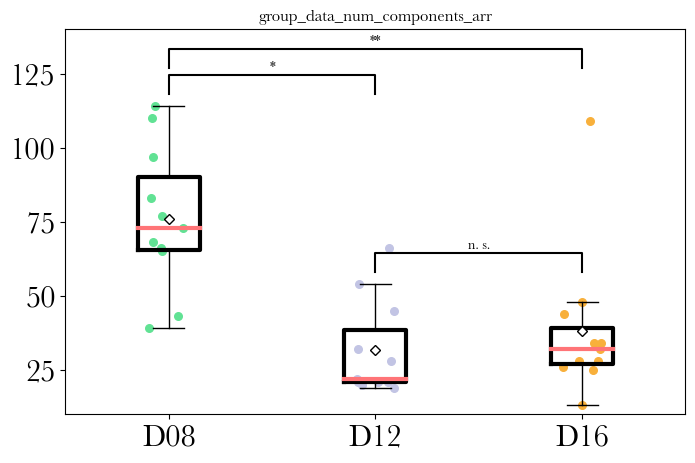

In [333]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams

# Define the RGB codes
rgb_codes = [(97, 226, 148),
             (194, 196, 228),
            (248, 176, 59)]

# Convert RGB codes to color strings
colors = ['#%02x%02x%02x' % rgb for rgb in rgb_codes]





fig, ax = plt.subplots(figsize=(8, 5))


# Create the box plot with y-axis limit and without outliers
medianprops = dict(linestyle='-', linewidth=3, color='#ff7477') #{'color': '#1c77c3'}
boxprops = dict(linestyle='-', linewidth=3, color='black')
box = ax.boxplot(merged_data.values(), showfliers=False,boxprops=boxprops,medianprops=medianprops,
                 showmeans=True,meanprops={"marker":"D", "markerfacecolor":"white", 
                      "markeredgecolor":"black",
                      "markersize":"5"}) 



# Create empty lists to store x and y values
x = []
y = []

# Iterate through each key in the dictionary
for i, key in enumerate(merged_data):
    x.extend([i + 1] * len(merged_data[key]))
    y.extend(merged_data[key])
    
    # Generate random offsets for scatter plot
    x_offset = np.random.uniform(low=-0.1, high=0.1, size=len(merged_data[key]))
    y_offset = np.random.uniform(low=0, high=0.0001*193.0, size=len(merged_data[key]))
    
    # Plot scatter plot with color based on i
    plt.scatter([i + 1] * len(merged_data[key]) + x_offset, 
                merged_data[key] + y_offset, color=colors[i % len(colors)],s=30, alpha=1)

# Set the plot title and axis labels
plt.title('group_data_num_components_arr')

# Set the positions of the x-ticks
xticks = range(1, len(merged_data.keys())+1)
ax.set_xticks(xticks)
ax.set_xticklabels(merged_data.keys())
# Set the axis font size and font family

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Baskerville']

ax.tick_params(axis='both', labelsize=22)
# Set the y-axis limit
ax.set_ylim(10,140)

heights = [100,105,110]
bars = np.arange(len(heights))+1
barplot_annotate_brackets(0, 1, p_value1 , bars, heights,dh=0.1)#p_value1 
barplot_annotate_brackets(0, 2, p_value2, bars, heights, dh=0.13)#p_value2
barplot_annotate_brackets(1, 2, p_value3, bars, heights,dh=-0.40)#p_value3
plt.savefig('group_data_num_components_arr.svg')

plt.show()


In [2]:
### Define the RGB codes
rgb_codes = [(28, 119, 195),
             (97, 226, 148),
             (248, 176, 59),
             (194, 196, 228),
             (255, 116, 119)]

# Convert RGB codes to color strings
colors = ['#%02x%02x%02x' % rgb for rgb in rgb_codes]

# Print the list of colors
print(colors)


['#1c77c3', '#61e294', '#f8b03b', '#c2c4e4', '#ff7477']
